## Overview of the SCAN-B Follow-up cohort (2010-2018)

In [98]:
# set wd
os.chdir(os.path.expanduser("~/PhD_Workspace/PredictRecurrence/"))

In [99]:
!ls -lh ./data/standardized/

total 3738960
-rw-r--r--  1 le7524ho  staff   4.9K Mar 10 15:41 SCANB_DNAmethylation.csv
-rw-r--r--  1 le7524ho  staff   1.6G Mar 10 15:40 SCANB_RNAseq_expression.csv
-rw-r--r--  1 le7524ho  staff   170M Mar 10 15:41 SCANB_RNAseq_mutations.csv
-rw-r--r--  1 le7524ho  staff   757K Mar 10 15:39 SCANB_clinical.csv
-rw-r--r--  1 le7524ho  staff   117K Mar 10 15:39 SCANB_sample_modalities.csv


In [100]:
# import 
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [101]:
# input paths
infile_1 = "./data/standardized/SCANB_sample_modalities.csv"
infile_2 = "./data/standardized/SCANB_clinical.csv"
infile_3 = "./data/standardized/SCANB_RNAseq_expression.csv"
infile_4 = "./data/standardized/SCANB_RNAseq_mutations.csv"
infile_5 = "./data/standardized/SCANB_DNAmethylation.csv"

In [102]:
# read in data
sample_modalities = pd.read_csv(infile_1)
clinical = pd.read_csv(infile_2)
RNAseq_expr = pd.read_csv(infile_3)
RNAseq_mut = pd.read_csv(infile_4)
DNAmethyl = pd.read_csv(infile_5)
DNAmethyl.columns = ["Sample"] # until the real data is loaded

## ER and HER2 status in SCAN-B


In [103]:
group_order = ["ER+HER2-", "ER+HER2+", "ER-HER2+", "TNBC", "Other"]

# Step 1: Count the occurrences of each group and reorder based on 'group_order'
group_counts = clinical['Group'].value_counts()[group_order]

# Step 2: Convert the Series into a DataFrame and rename the count column as 'Count'
group_counts_df = group_counts.reset_index(name='Count')

# Step 3: Add a new column 'Percentage' and calculate the percentage for each group
group_counts_df = group_counts_df.assign(
    Percentage=lambda x: (x['Count'] / x['Count'].sum()) * 100
)

# Step 4: Round the 'Percentage' column to 0 decimal places
group_counts_df = group_counts_df.round({'Percentage': 0})

# Step 5: Rename the 'index' column to 'Group'
group_counts_df = group_counts_df.rename(columns={'index': 'Group'})

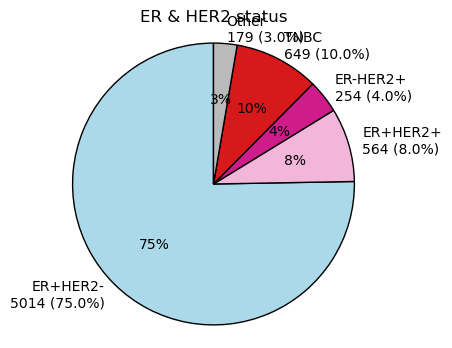

In [104]:
# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(group_counts_df['Count'], 
        labels=group_counts_df['Group'] + '\n' + group_counts_df['Count'].astype(str) + ' (' + group_counts_df['Percentage'].astype(str) + '%)', 
        autopct='%1.0f%%', 
        colors=['#abd9e9', '#f1b6da', '#d01c8b', '#d7191c', '#bababa'], 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'})

# Title and aesthetics
plt.title('ER & HER2 status')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

## Sample sets with available data modalities

### In the whole SCAN-B cohort

In [105]:
sample_modalities.head()

,Sample,clinical,RNAseq_expression,RNAseq_mutations,DNAmethylation
0,S000001,1,1,1,0
1,S000002,1,1,1,0
2,S000006,1,1,1,1
3,S000008,1,1,1,0
4,S000011,1,1,1,0


In [106]:
# Create a list of sample groups based on conditions in the DataFrame
venn_dict = {
    "DNAmethyl": set(sample_modalities[sample_modalities['DNAmethylation'] == 1]['Sample']),
    "RNAseq_mut": set(sample_modalities[sample_modalities['RNAseq_mutations'] == 1]['Sample']),
    "RNAseq_gex": set(sample_modalities[sample_modalities['RNAseq_expression'] == 1]['Sample'])
}
dict_labels = list(venn_dict.keys())  # List of set labels ('Set 1', 'Set 2', 'Set 3')
dict_values = list(venn_dict.values())  # List of corresponding sets

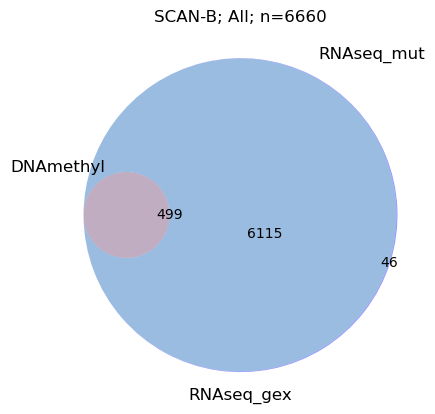

In [107]:
venn3(dict_values, set_labels=dict_labels)
plt.title(f"SCAN-B; All; n={len(sample_modalities['Sample'])}")
#plt.suptitle("With variants from RNAseq", fontsize=10,)
plt.show()

### In the ER+HER2- subset

In [108]:
clin_group = "ER+HER2-" 

# Prepare list of sample groups using a dictionary
venn_dict = {
    "DNAmethyl": set(sample_modalities['Sample'][
        (sample_modalities['DNAmethylation'] == 1) & 
        (sample_modalities['Sample'].isin(clinical['Sample'][clinical['Group'] == clin_group]))
    ]),
    "RNAseq.mut": set(sample_modalities['Sample'][
        (sample_modalities['RNAseq_mutations'] == 1) & 
        (sample_modalities['Sample'].isin(clinical['Sample'][clinical['Group'] == clin_group]))
    ]),
    "RNAseq.gex": set(sample_modalities['Sample'][
        (sample_modalities['RNAseq_expression'] == 1) & 
        (sample_modalities['Sample'].isin(clinical['Sample'][clinical['Group'] == clin_group]))
    ])
}
dict_labels = list(venn_dict.keys())  # List of set labels ('Set 1', 'Set 2', 'Set 3')
dict_values = list(venn_dict.values())  # List of corresponding sets

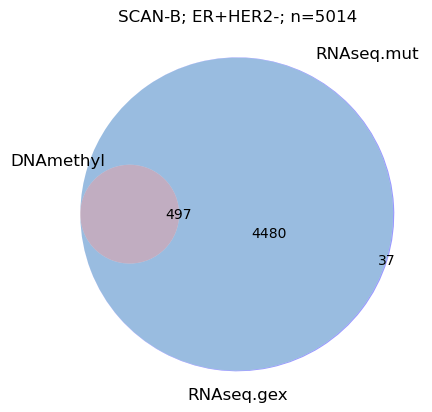

In [109]:
# Create Venn diagram
venn3(dict_values, set_labels=dict_labels)

# Customizing plot
plt.title(f"SCAN-B; {clin_group}; n={len(clinical['Sample'][clinical['Group'] == clin_group])}")
#plt.subplot(111).set_title("With variants from RNAseq")

# Show the plot
plt.show()